<a href="https://colab.research.google.com/github/Afina78/Afina78/blob/main/HW_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('adult.csv')
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

Заменим все знаки "?" на NaN

In [ ]:
# Замена знаков '?' на NaN
df.replace('?', np.nan, inplace=True)
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18        NaN  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


В датасете строковые и целочисленные данные.

Посмотрим на пропуски в более удобном виде

In [ ]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Имеем пропуски в трех колонках данных, посмотрим сколько они составляют в процентах

In [ ]:
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_values_percent

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

Так как процент пропущенных данных у нас маленький, можно удалить пропущенные значения

In [ ]:
df_clean = df.dropna()

Посмотрим основную статистику датасета

In [ ]:
df_clean.describe()

age        fnlwgt  educational-num  capital-gain  \
count  45222.000000  4.522200e+04     45222.000000  45222.000000   
mean      38.547941  1.897347e+05        10.118460   1101.430344   
std       13.217870  1.056392e+05         2.552881   7506.430084   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.173882e+05         9.000000      0.000000   
50%       37.000000  1.783160e+05        10.000000      0.000000   
75%       47.000000  2.379260e+05        13.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  45222.000000    45222.000000  
mean      88.595418       40.938017  
std      404.956092       12.007508  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

средний возраст 38,64 лет, минимальный 17 лет, максимальный 90

В среднем работают по 40 часов в неделю, минимум 1 час, максимум 99

В среднем имеем людей с высшим образованием

Посмотрим на категориальные данные, рассчитаем моду

In [ ]:
mode_values = df_clean[['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                        'race', 'gender', 'native-country', 'income']].mode()

print("Мода для каждой из выбранных колонок:")
mode_values.head()

Мода для каждой из выбранных колонок:


workclass education      marital-status    occupation relationship   race  \
0   Private   HS-grad  Married-civ-spouse  Craft-repair      Husband  White   

  gender native-country income  
0   Male  United-States  <=50K

Среди категориальных данных наиболее часто встречаются женатые мужчины, проживающие в США с заработной платой менее или равно 50К, имеющие высшее образование, работающими в сфере строительства

Визуализируем данные для того чтоб лучше их понять

In [ ]:
fig = px.histogram(df_clean, x = 'age', nbins = 20, title='Распределение возраста')
fig.show()


наибольшее количество людей в выборке предствлено в возрастном диапазоне от 20 до 60 лет

In [ ]:
gender_counts = df_clean['gender'].value_counts()
print(gender_counts)

gender
Male      30527
Female    14695
Name: count, dtype: int64


In [ ]:
fig = px.pie(df_clean, names='gender', title='Распределение по гендерным группам')
fig.show()

Выборка в основном представлена мужчинами 30527 человек, что составило 67,5%, женщин 14695 человек, что составило 32,5%.

In [ ]:
fig = px.pie(df_clean, names='income', title='Распределение доходов')
fig.show()

75% представленной выборки имеют доход менее или равный 50К

In [ ]:
fig = px.histogram (df_clean , x = 'income' , category_orders = dict ( day = ['<=50K', '<50K']),color = 'gender',
                    marginal = 'rug', nbins = 20, title='Распределение по доходу Vs. Пол', barmode='overlay')
fig.show()

В распределении дохода по полу наблюдаем что мужчин гораздо больше среди тех кто имеет доход бодее 50К, с доходом равным или менее 50 К немного больше женщин

In [ ]:
fig = px.histogram (df_clean , x = 'age' , color = 'gender' , marginal = 'rug',nbins = 20,
                    title='Распределение возраста по гендеру', barmode='overlay')
fig.show()

Также мужчины превалируют в выборке

In [ ]:
fig = px.histogram (df_clean , x = 'age' , color = 'income' , marginal = 'rug', nbins = 20,
                    title='Распределение возраста по доходу', barmode='overlay')
fig.show()

В основном в выборке люди с доходом <=50К,при этом мы наблюдаем количественный скачок от 19 лет и затем плавное снижение количества людей в возрасте начиная от 30 лет.

Доходами более >50К обладает гораздо меньшее количество людей и в основном это возрастной диапазон от 25 до 64 лет, причем наибольшей пик по количеству приходится на 35 - 49 лет.

In [ ]:
print(df_clean['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


In [ ]:
fig = px.histogram (df_clean , x = 'marital-status' , category_orders = dict ( day = ['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated', 'Divorced',
                    'Married-spouse-absent', 'Married-AF-spouse']),color = 'income', marginal = 'rug', nbins = 20, title='Распределение по материальному статусу и доходу', barmode='overlay')
fig.show()

In [ ]:
df_high_income = df_clean[df_clean['income'] == '>50K']
occupation_counts = df_high_income['occupation'].value_counts().sort_values(ascending=False)

# Преобразование в DataFrame для использования в графике
occupation_counts_df = occupation_counts.reset_index()
occupation_counts_df.columns = ['occupation', 'count']

# Построение столбчатой диаграммы с сортировкой
fig = px.bar(occupation_counts_df, x='occupation', y='count', color='occupation',
             title='Распределение профессий среди людей с доходом >50K')
fig.show()

В топ-5 вошли профессии:

исполнительный директор -  2 867 человек,

профессиональные специалисты - 2704 человека,

продажники - 1455 человек,

специалисты по крафтовому ремонту - 1355 человек,

административные сотрудники - 756 человек.


In [ ]:
df_high_income = df_clean[df_clean['income'] == '<=50K']
occupation_counts = df_high_income['occupation'].value_counts().sort_values(ascending=False)

# Преобразование в DataFrame для использования в графике
occupation_counts_df = occupation_counts.reset_index()
occupation_counts_df.columns = ['occupation', 'count']

# Построение столбчатой диаграммы с сортировкой
fig = px.bar(occupation_counts_df, x='occupation', y='count', color='occupation',
             title='Распределение профессий среди людей с доходом <=50K')
fig.show()

В топ-5 вошли профессии:

административные сотрудники - 4784 человека,

специалисты по крафтовому ремонту - 4665 человек,

специалисты сервисов - 4612 человек,

продажники - 3953 человека,

профессиональные специалсты - 3304 человека.

Приступим к подготовке данных для модели

**income - целевая переменная**

Проанализируем пизнаки:

**Числовые признаки:**

age: Возраст может иметь значительное влияние на доход.

fnlwgt: Вес выборки, может быть полезен для анализа, но часто его исключают, так как это не чистый признак, а информация о репрезентативности данных.

educational-num: Числовой эквивалент уровня образования, может быть лучше, чем

education, поскольку предоставляет упорядоченное числовое значение.

capital-gain: Доход от прироста капитала, может прямо влиять на доход.

capital-loss: Потери капитала, также важный признак.

hours-per-week: Количество рабочих часов в неделю, напрямую связано с доходом.

**Категориальные признаки:**

workclass: Тип занятости может оказывать влияние на доход.

education: Уровень образования, тесно связан с профессиональными навыками и доходом.

marital-status: Семейное положение, может влиять на экономическую активность и доход.

occupation: Профессия, имеет прямое влияние на уровень дохода.

relationship: Родственные отношения, может быть косвенно связано с доходом.

race: Раса, может быть включена для учета возможных диспропорций, но следует использовать осторожно.

gender: Пол, может влиять на доход из-за различных факторов.

native-country: Страна происхождения, может учитывать региональные различия в доходе.



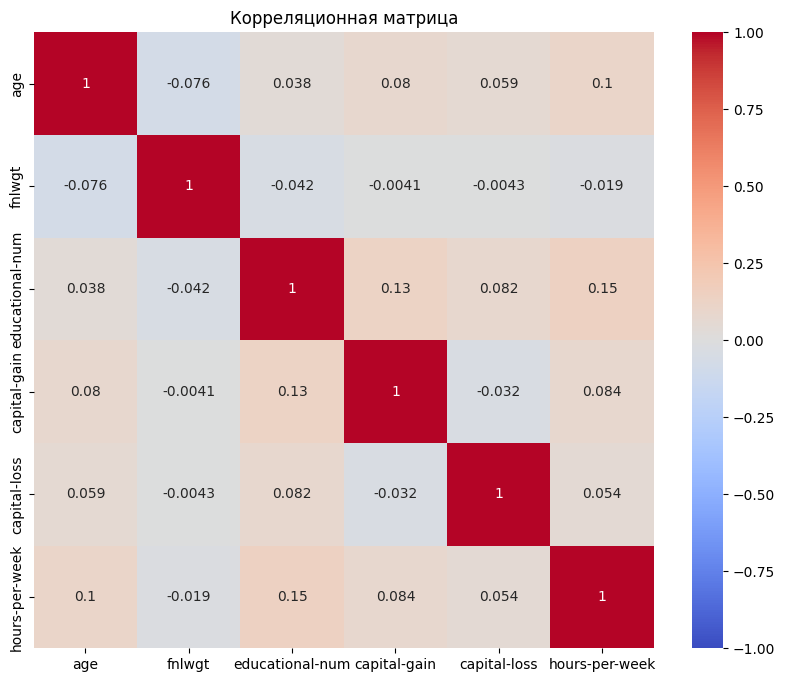

In [ ]:
corr_matrix = numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr_matrix = df_clean[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()
plt.show()

In [ ]:
print(df_clean['income'].value_counts())

income
<=50K    34014
>50K     11208
Name: count, dtype: int64


Целевая переменная у нас неравномерно распределена между категориями (несбалансированные данные), в данном случае можно сделать  синтетическое увеличение меньшенства, либо уменьшение большинства данных (ресемплинг).

Для модели возьмем наиболее значимые признаки:

age, educational-num, capital-gain, capital-loss, hours-per-week, occupation, gender

Оставим в датасете только необходимые признаки и целевую переменную

In [ ]:
df_model = df_clean.drop(['workclass',	'fnlwgt',	'education',	'marital-status',	'relationship',	'race',	'native-country'], axis = 1)
df_model.head()

age  educational-num         occupation gender  capital-gain  capital-loss  \
0   25                7  Machine-op-inspct   Male             0             0   
1   38                9    Farming-fishing   Male             0             0   
2   28               12    Protective-serv   Male             0             0   
3   44               10  Machine-op-inspct   Male          7688             0   
5   34                6      Other-service   Male             0             0   

   hours-per-week income  
0              40  <=50K  
1              50  <=50K  
2              40   >50K  
3              40   >50K  
5              30  <=50K

Проведем кодирование данных при помощи One-Hot Encoding и далее проведем стандартизацию данных для улучшения работы модели.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Определение признаков и целевой переменной
X = df_model.drop('income', axis=1)
y = df_model['income']

In [ ]:
# Определение этапов предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']),
        ('cat', OneHotEncoder(), ['occupation', 'gender'])
    ])

In [ ]:
# Определение пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat', OneHotEncoder(),
                                                  ['occupation', 'gender'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
class_labels = pipeline.named_steps['classifier'].classes_
print(f'Class labels: {class_labels}')

Class labels: ['<=50K' '>50K']


In [ ]:
# Оценка модели
score = pipeline.score(X_test, y_test)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.83


In [ ]:
score = pipeline.score(X_train, y_train)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.83


Тчоность модели 83%, это означает что в 17% случаев модель выдает не верное предсказание по уровню дохода человека.

In [ ]:
# Предсказание на тестовом множестве
y_pred = pipeline.predict(X_test)

In [ ]:
# Сравнение предсказаний с истинными значениями
print("True values:", y_test.values)
print("Predictions:", y_pred)

True values: ['<=50K' '<=50K' '>50K' ... '<=50K' '<=50K' '<=50K']
Predictions: ['<=50K' '<=50K' '<=50K' ... '<=50K' '>50K' '<=50K']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Оценка модели
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[6442  400]
 [1160 1043]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      6842
        >50K       0.72      0.47      0.57      2203

    accuracy                           0.83      9045
   macro avg       0.79      0.71      0.73      9045
weighted avg       0.82      0.83      0.81      9045



Матрица ошибок показывает что модель в 6442 случаев предсказала верно что доход <=50K, и в 400 случаев предсказала что доход <=50K, а на самом деле он >50К, так же в 1160 случаев она предсказала что доход <=50K, хотя на самом деле она >50К, и в 1043 случаев правильно предсказала доход >50К.

Итого: в целом модель не плохо предсказывает, но на доходе >50К отрабатывает хуже, так как мы пропустили этап по балансировке данных.

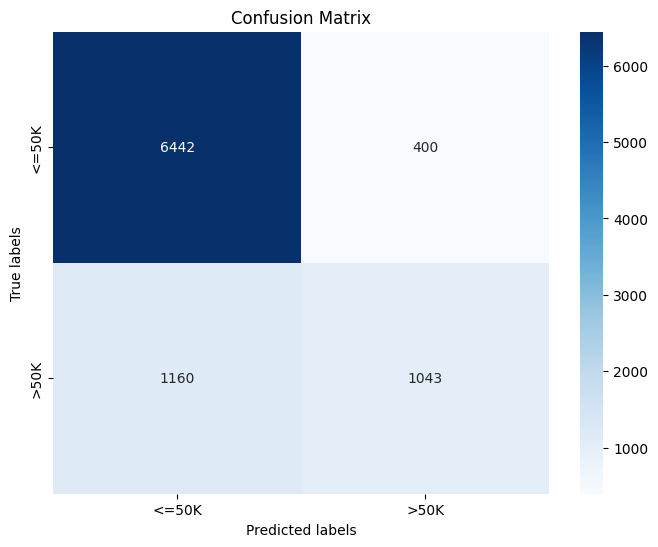

In [ ]:
# Получение матрицы ошибок
cm = confusion_matrix(y_test, y_pred, labels=class_labels)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Построим и обучим модель опорных векторов (SVC) на тех же данных

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Определение пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='poly'))
])

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели
pipeline.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat', OneHotEncoder(),
                                                  ['occupation', 'gender'])])),
                ('classifier', SVC(kernel='poly'))])

In [ ]:
# Оценка модели
score = pipeline.score(X1_test, y1_test)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.83


In [ ]:
# Оценка модели
score = pipeline.score(X1_train, y1_train)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.83


с линейным ядром модель дала точность 82%, с полиномиальным 83%

**Выводы:** для улучшения точности модели возможно нужно было взять больше метрик, так же можно было сбалансировать данные целевой переменной увеличив группу по доходу >50K, тогда модель лучше бы отрабатывала предсказания на этих данных. В процессе работы мы загрузили, данные, ознакомились с их набором, заменили пропуски на корректные, и удалили их, так как процент об ощего количества данных был не велик. Можно было заполнить пропуски наиболее встречающимися значениями, средними значениями, медианой, предсказать их, методом рекуррентного подхода. Визуализировали выборочно данные для более детального их изучения. Определили наиболее значимые метрики, можно было простить модель по всем местрикам в наборе данных, но тогда модель получается более тяжелая, дольше отрабатывет и есть склонность к переобучению. Далее мы выделили целевую переменную - доход. Стандартизировали данные для приведения их к общему виду, затем закодировали категориальные данные, выполнили разделение на тестовую и обучающую выборки, обучили две модели, оценили их качество.